In [1]:
#importing all the important library which is used in these dataset
import numpy as np,pandas as pd,matplotlib.pyplot as plt,warnings as w,seaborn as sb
w.filterwarnings('ignore')
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.feature_selection import chi2,SelectKBest #this class used to select impt feature from dataset but u
#have to used minmaxscaler for performing scaling technique

In [2]:
#now loading and reading the dataset of automobile by using read_csv() built in method of pandas library
csv_file = r'D:\ML_INSURANCE_CLAIM_PREDICTION\artifacts\raw.csv'
df = pd.read_csv(csv_file,sep=',')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
#to show all the information about df object so that we can get clearly idea about null,dtypes,total records,consume memory!!!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [4]:
#if i want to show the statistiscal and mathematical summary about df object (specifically on numeric column)
df.describe()

#conclusion:- in charges column showing +ve skewness bcoz of that outlier datapoint may exist in 
#df object bcoz of that accuracy of model decrease

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [5]:
#Performing EDA to the Dataset

#checking for duplicate records
df.duplicated(subset=df.columns).sum()

1

In [6]:
#showing 1 records is duplicate in df object so we drop those records from df object
df.drop_duplicates(subset=df.columns,inplace=True,ignore_index=True)

In [7]:
#checking again duplicate record removed or not from df object
df.duplicated(subset=df.columns).sum()

0

# checking for null value

In [8]:
#step2) checking for null value exist or not in df object
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [9]:
#cross checking the null value by finding out each column dtype and comparing with those column record dtype ke saath
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [10]:
df.head() #by default showing 5 records from df object

#conclusion no null exist in given df object

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


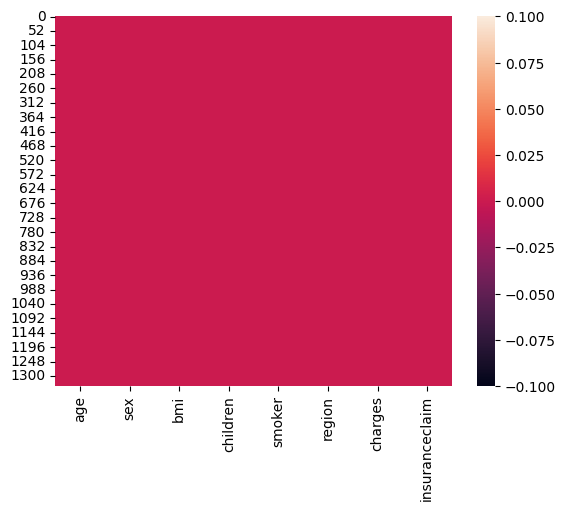

In [11]:
#visualizing the null value 
sb.heatmap(df.isnull())
plt.show()

# checking for Outliers 

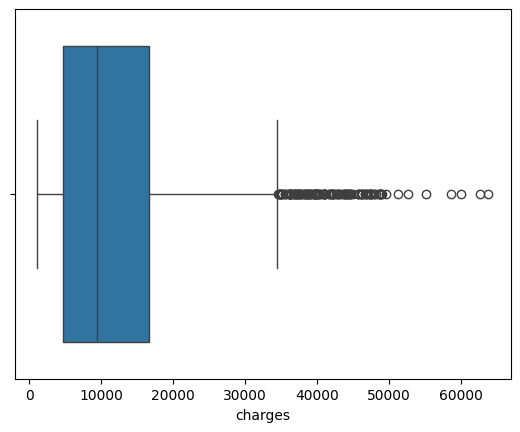

In [12]:
#step3) :-
#checking for Outliers exists or not in given df object
#generally if outliers present in dataset and dtype output variable is categorical type,labelled out,object dtype 
#then we gonna use classification algorithm bcoz of that most of the algorithm taken care the outliers and skenwss from datset
sb.boxplot(data=df,x = 'charges')
plt.show()
#boxplot we used to measure dispersion of datset and suitable if dtype of column is CNDT

In [13]:
# #using tranditional way to measure dispersion of datapoint finding out q1,q3,iqr...so on
# q1 = df['insuranceclaim'].quantile(0.25)  #25% of contineous numeric dtype column
# print(f'First Quantile: {q1}')

# #calculating 3rd quantile
# q3 = df['insuranceclaim'].quantile(0.25)  #75% of contineous numeric dtype column
# print(f'Third Quantile: {q3}')

# #calculating IQR
# iqr = q3-q1
# print(f'Inter Quantile Range: {q3}')

# #calculating lw and uw bound
# lw = q1-1.5*iqr
# print(f'Lower whisker bound: {lw}')

# #calculating upper whisker bound
# uw = q3+1.5*iqr
# print(f'Upper whisker bound: {uw}')

# #now using condition filtering out dispersion datapoint from dataset
# len(df[(lw>df['insuranceclaim']) | (uw<df['insuranceclaim'])])

# step4):- Converting Object Column to Numeric by using LabelEncoder of sklearn library

In [14]:
#step4):- Converting Object Column to Numeric by using LabelEncoder of sklearn library

#in case:- if i am creating End to End Project LabelEncoder not work there 
#if we want to make to be Work so we have to create customLabelEncoder class

#so calling the class of BaseEstimator,TransformerMixin of sklearn libarary
from sklearn.base import BaseEstimator,TransformerMixin

#creating customLabelEncoder class in that class we have to pass parameter BaseEstimator,TransformerMixin in it
class CustomLabelEncoder(BaseEstimator,TransformerMixin):
    #creating constructor method to run automaticall when creating this class object
    def __init__(self):
        pass
    
    #creating object class method fit in which we r passing input variable and output variable to be None
    def fit(self,x,y=None):
        return self
    
    #creating another method of object class to do transformation to input variables
    def Transformation(self,x):
        #creating empty 2d numpy array object
        x_encoded = np.empty(x.shape,dtype='object')
        #now iterating input variable column
        for i in range(x.shape[1]):
            #creating object of LabelEncoder Class
            le = LabelEncoder()
            
            #now transforming input variable and convertiong into numeric
            
            x_encoded[: ,i] = le.fit_transform(x_encoded[: ,i])
        return x_encoded

In [15]:
#without using above class how do we convert object column to numeric column using LabelEncoder
#here this given dataset does not contain any object column in it so we cannot convert object column to numeric column

# Through Pipeline class and Simple Imputer class of sklearn how do we create Pipelines of steps and fill null value

In [16]:
#pipeline we r creating a block of steps so that each step output variable used as input variable by another steps
#simple imputer class we used to fill null value

In [17]:
#selecting input and output variable
x = df.drop('insuranceclaim',axis=1) #must be 2d in nature
y = df['insuranceclaim']    #must be 1d in nature
x.ndim,y.ndim

(2, 1)

In [18]:
#selecting numeric_column from df object
numeric_column = x.select_dtypes(exclude='object').columns.to_list()
categorical_column = x.select_dtypes(include='object').columns.to_list()
numeric_column,categorical_column

(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], [])

In [19]:
#creating numeric pipeline class object and defining steps of block to perform!!!
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')), #filling the null value in numeric column to be median
    ('scaling',StandardScaler(with_mean=False))#performing scaling to the numeric column datset   
])
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler(with_mean=False))])

In [20]:
#creating categorical pipeline object to perform following task/steps in categorical column dataset
cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')), #filling the null value by mode
    ('encoding',CustomLabelEncoder()),#converting object column to numeric through this steps
    ('scaling',StandardScaler(with_mean=False)) #performing scaling to the numeric column datset  
])
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoding', CustomLabelEncoder()),
                ('scaling', StandardScaler(with_mean=False))])

In [21]:
#combining both pipeline by using columntransformer class of sklearn library to get preprocessing step
#after then we can use this preprocessing steps and algorithm object to create pipeline

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,numeric_column), #this step means num_pipeline we used to perform on  numeric_columns
    ('cat_pipeline',cat_pipeline,categorical_column)
])
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 ['age', 'sex', 'bmi', 'children', 'smoker',
                                  'region', 'charges']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  CustomLabelEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 [])])

In [22]:
#calling logisticRegression class of sklearn
from sklearn.linear_model import LogisticRegression

In [23]:
#once we have created this preprocessor object with help of that we can create another pipeline to perform training on model
model_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    #this preprocessor object do filling null value and convert object to numeric and perform scaling to it
    ('model',LogisticRegression())#this algorith model we used for training the model
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['age', 'sex', 'bmi',
                                                   'children', 'smoker',
                                                   'region', 'charges']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   CustomLabelEncoder()),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  [])])),
                ('model', LogisticRegression())])

In [24]:
model_pipeline.named_steps
#once we create this pipeline then we can train model through this pipeline and 
#test model too and also find the accuracy of model too

{'preprocessor': ColumnTransformer(transformers=[('num_pipeline',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaling',
                                                   StandardScaler(with_mean=False))]),
                                  ['age', 'sex', 'bmi', 'children', 'smoker',
                                   'region', 'charges']),
                                 ('cat_pipeline',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('encoding',
                                                   CustomLabelEncoder()),
                                                  ('scaling',
                                                   StandardScaler(with_mean=False))]),
          

# traditional way how we performing training and testing to data

In [25]:
#step5:- before splitting the data into 80:20 ratio 
#first we have to check output variable dtype which is discrete,categorical,object,labeled dtype
#so we have to used classification algorithm for the dataset

#before that we have to check output variable how many class classifier it is and 
#if it is binary class classifiser then we have to check data quantity of both class and find out it is balanced 
#or not in quantity(differnece should not be more than 50%) if it is not balanced then we have to make balanced of both class 
#by using random over sampling of imblearn library

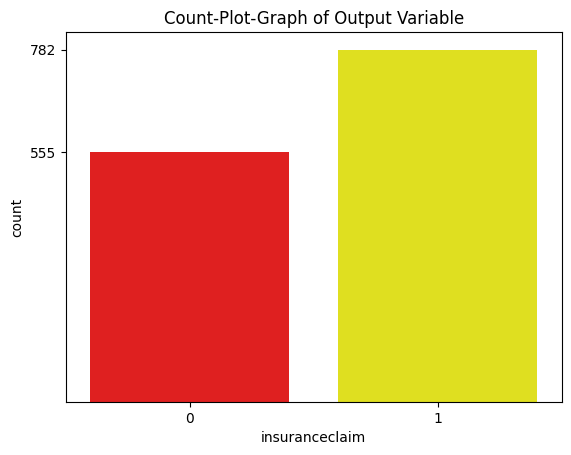

In [26]:
#visualizing the output variable by using coutplot graph
#it is a frequency graph generally we used this graph if dtype of object is discrete,categorical,object,labeled dtype
plt.title('Count-Plot-Graph of Output Variable')
sb.countplot(data=df,x = 'insuranceclaim',palette=['red','yellow'])
f = df['insuranceclaim'].value_counts()
plt.yticks(f)
plt.show()
#the difference btn upper class is not twice the lower class so it is balanced quantity in nature

# splitting the data into 80:20 ratio 

In [27]:
from sklearn.model_selection import train_test_split

#creating an object of train_test_split class
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.ndim,x_test.ndim,y_train.ndim,y_test.ndim

(2, 2, 1, 1)

In [28]:
x_train.head()

,age,sex,bmi,children,smoker,region,charges
1113,23,1,24.510,0,0,0,2396.09590
967,21,1,25.745,2,0,0,3279.86855
598,52,0,37.525,2,0,1,33471.97189
170,63,1,41.470,0,0,2,13405.39030
275,47,0,26.600,2,0,0,9715.84100


In [29]:
#step7);- Now Performing Scaling to the dataset
#scaling we do only on input variable
#so calling class of StandardScaler of sklearn
from sklearn.preprocessing import StandardScaler

#creating object of StandardScaler
ss = StandardScaler()

x_train = ss.fit_transform(x_train) #converted train df object to 2d numpy array object
x_test = ss.transform(x_test)       #converted test df object to 2d numpy array object

In [30]:
x_train

array([[-1.1576804 ,  0.97140947, -0.99692768, ..., -0.50029231,
        -1.38394601, -0.90881619],
       [-1.30061876,  0.97140947, -0.79276204, ..., -0.50029231,
        -1.38394601, -0.83328687],
       [ 0.91492586, -1.029432  ,  1.15466402, ..., -0.50029231,
        -0.47798258,  1.74700229],
       ...,
       [-1.37208794,  0.97140947, -1.4118716 , ..., -0.50029231,
         1.33394429, -0.94567747],
       [-0.08564268, -1.029432  , -0.41997378, ..., -0.50029231,
         1.33394429, -0.50244288],
       [-0.30005022, -1.029432  ,  0.87941237, ..., -0.50029231,
         0.42798086, -0.6147893 ]])

# selecting the ML classification 1st Algorithm

In [31]:
#calling the class
from sklearn.linear_model import LogisticRegression
#creating an object of LogisticRegression class
lr = LogisticRegression(random_state=42)
lr

LogisticRegression(random_state=42)

In [32]:
#now training the model on 80% of train data by using fit() built in method of LogisticRegression class of sklearn
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [33]:
#testing the model by 20% test data and predicting the output variable by using sigmoid formula y=1/(1+e-x)
#bcoz logistic regression working on sigmoid mechanism
#and backend of this algorithm 1 condition is also defined in it np.where(y>0.5,1,0)
#predict is the built in method of logistic regression class
y_pred = lr.predict(x_test)
y_pred[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [34]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [35]:
#now creating a dictatonary to compare actual and predicted output variable in structured formed
dict={
    'actual_output_variable':y_test,
    'predicted_output_variable':y_pred
}
df_output = pd.DataFrame(dict)
df_output.head()

,actual_output_variable,predicted_output_variable
899,0,0
1063,0,0
1255,0,0
298,1,1
237,0,1


In [36]:
#checking the model is overfitted or underfitted
training_score = lr.score(x_train,y_train)
print(f'Training Score Model: {training_score}')

testing_score = lr.score(x_test,y_test)
print(f'Testing Score Model: {testing_score}')

#differnece btn training and testing score is approximately 1% so that we can say model is balanced in nature
#and we can clearly see that test score> train score may be model is underfitted

Training Score Model: 0.8737137511693172
Testing Score Model: 0.8843283582089553


In [37]:
#evaluating the model by finding out classification report and confusion matrix by using metrics class of sklearn library
from sklearn.metrics import classification_report,confusion_matrix

#creating an object of classification_report,confusion_matrix class
cr = classification_report(y_test,y_pred)
print(cr)

print(confusion_matrix(y_test,y_pred))

#below result we can conclude the recall score for both class is coming out be nearly 90% 
#but we cannot relay to this accuracy bcoz we have not selected the feature yet so we have to find out 
#which input variable is impt to find output variable
#this thing will be achieve by using decision tree classifier algorithm

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       117
           1       0.90      0.89      0.90       151

    accuracy                           0.88       268
   macro avg       0.88      0.88      0.88       268
weighted avg       0.88      0.88      0.88       268

[[102  15]
 [ 16 135]]


# 2nd classification algorithm:- Decision Tree classifier algorithm

In [38]:
#calling the class of Decision Tree classifier algorithm
#is working on 2 method a)entropy method formula behind this algo -p*loge(p)-q*loge(q) b)gini index method
#formula behind this algo 1-p^2-q^2
#in dt classifier algo whatever method we r using it rtn information gain value of each feature 
#and they take participate in formation tree and according to information gain algoith take decision and put feature is nodes 
#root branch leaf node most impt feature comes at top of the tree and less impt ferature comes at bottom of tree
from sklearn.tree import DecisionTreeClassifier

#creating an object of DecisionTreeClassifier  algorithm
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [39]:
#now training the model by giving 80% train data to the algorithm
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
#now testing the model by giving 20% test data to this algorithm and predicting the output variable
y_pred_dt = dt.predict(x_test)

In [41]:
#now creating a dictatonary to compare actual and predicted output variable in structured formed
dict={
    'actual_output_variable':y_test,
    'predicted_output_variable':y_pred_dt
}
df_output_dt = pd.DataFrame(dict)
df_output_dt.head()

,actual_output_variable,predicted_output_variable
899,0,0
1063,0,0
1255,0,0
298,1,1
237,0,0


In [42]:
#DecisionTreeClassifier algorithm return information gain value of each feature--after training the model
#highest information gain value indicate most impt feature to find output variable
ig = dt.feature_importances_
ig

array([0.07545454, 0.        , 0.39240582, 0.38425861, 0.1409642 ,
       0.        , 0.00691683])

In [43]:
#now creating a structure data to show which feature showing how much ig value in it
dict={
    'features':x.columns,
    'ig':ig
}
df_ig = pd.DataFrame(dict)
#now soring the df_ig object in descending ordersort_index
df_ig.sort_values(by='ig',axis=0,ascending=False,inplace=True,ignore_index=True)
df_ig

,features,ig
0,bmi,0.392406
1,children,0.384259
2,smoker,0.140964
3,age,0.075455
4,charges,0.006917
5,sex,0.000000
6,region,0.000000


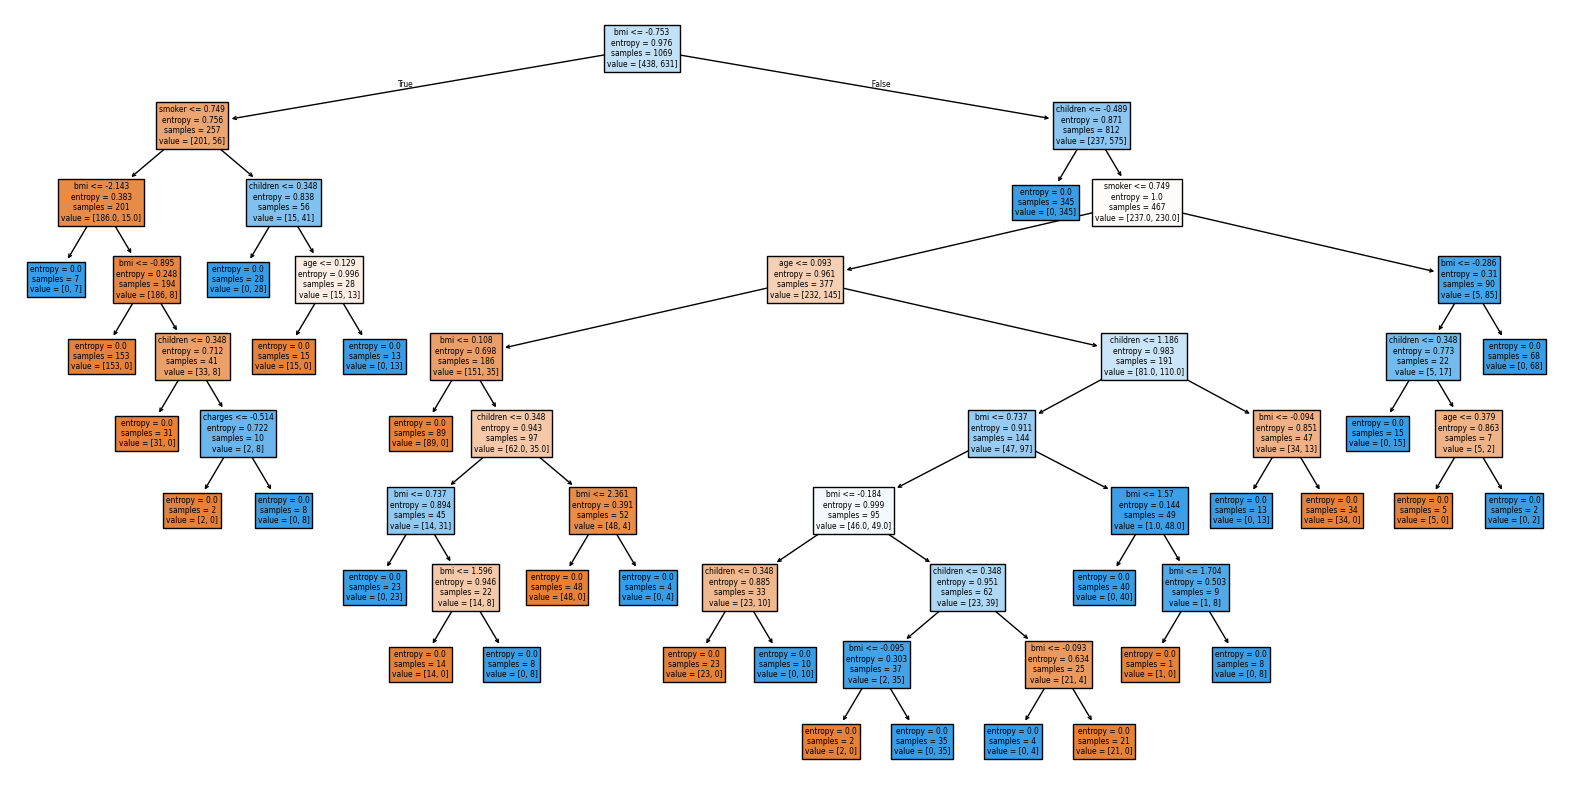

In [44]:
#now visualizing how the tree is forming if we used entropy as criterion 
#and above ig value take participate in formation of tree bcoz of that model will get overfitted

#so calling the class of tree
from sklearn.tree import plot_tree

#creating an object of plot__tree class
plt.figure(figsize=(20,10))  # Adjust the size of the plot as needed
plot_tree(dt,feature_names=x.columns,filled=True)
plt.show()

In [45]:
#now evaluating the model by finding out classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_dt))
print()
print(confusion_matrix(y_test,y_pred_dt))

#if we used dt classifier algorithm accuracy for both class coming out to be more than 98% but we cannot relay to this result
#bcoz each feature ig value taken participate in the formation of tree bcoz of the model get over fitted 
#to overcome the overfitting we have to used pruning techniques of hyperpas=ramters

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       117
           1       0.99      0.99      0.99       151

    accuracy                           0.99       268
   macro avg       0.99      0.99      0.99       268
weighted avg       0.99      0.99      0.99       268


[[115   2]
 [  1 150]]


In [46]:
#creating an function 
def function(model):
    #training the model
    model.fit(x_train,y_train)
    #testing the model
    y_predict=model.predict(x_test)
    #now evaluating the model and getting classification report of model
    from sklearn.metrics import classification_report,confusion_matrix
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    return model

# to remove the overfitting from the model we r using pruning technique of hyperparameter

In [47]:
#hyperparametes that we r using is max_depth 
#data scientist has worked on differnt differnt datset and given conclusion max_depth for any dataset should not be more than>8
#means we have to cut the bottom branch of tree which is less impt to find output variable
#if i am using max_depth hyperparmaete means we have to find at what minimum no of depth we r getting accuracy of model of high

#so iots a hit and trial method
# for depth in range(8,0,-1):
#     print(f'depth of tree is: {depth}')
#     #this hyperparameter we have to pass in dt classifier alogrithm object
#     dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=depth,random_state=42)
#     #'now training the model by giving 80% train data to algorithm
#     dt1.fit(x_train,y_train)
#     #now testing the model by giving 20% test data to algorithm
#     y_pred = dt1.predict(x_test)
    
#     #evaluating the model
#     from sklearn.metrics import classification_report,confusion_matrix
#     print(classification_report(y_test,y_pred))
#     print()
#     print(confusion_matrix(y_test,y_pred))
#     print('='*50)


#conclusion    
#at min depth 3 we r getting recall accuracy good comaprative to others depth so we will take that into consideration    

In [48]:
#again creating dt classifier algorithm object with max_depth=3 of hyperparameter
dt1 = DecisionTreeClassifier(random_state=42,max_depth=3,criterion='entropy')

In [49]:
#now calling the user fefined function
dt1 = function(dt1)
dt1

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       117
           1       0.98      0.81      0.89       151

    accuracy                           0.88       268
   macro avg       0.89      0.90      0.88       268
weighted avg       0.90      0.88      0.88       268

[[115   2]
 [ 29 122]]


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [50]:
#checking the ig value return in DecisionTreeClassifier class object if we set max_depth hyperparameter then
dt1.feature_importances_
dict={'ig':dt1.feature_importances_,'feature':x.columns}
df=pd.DataFrame(dict)
df.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,ig,feature
0,0.449333,children
1,0.295893,bmi
2,0.254774,smoker
3,0.000000,age
4,0.000000,sex
5,0.000000,region
6,0.000000,charges


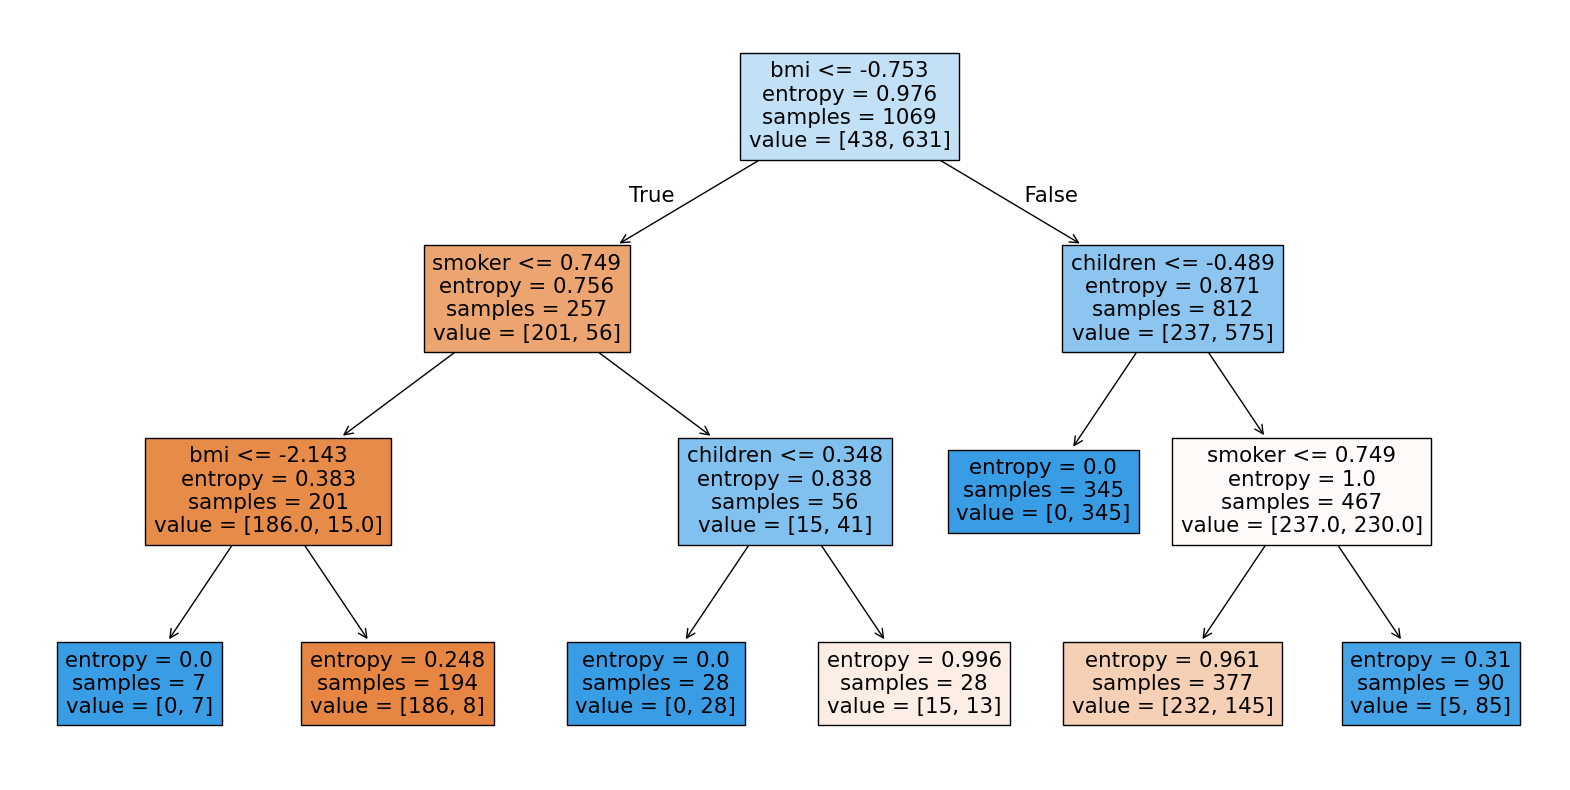

In [51]:
#so calling the class of tree
from sklearn.tree import plot_tree

#creating an object of plot__tree class
plt.figure(figsize=(20,10))  # Adjust the size of the plot as needed
plot_tree(dt1,feature_names=x.columns,filled=True)
plt.show()

# removing overfitting from model by using pruning technique here we r using min_sample_leaf hyperpaprmeter for tuning

In [52]:
#means at what minimum no of sample leaf(child node) we r getting high accuracy of model
#so doing hit trial method 
#data scientist work on differnt differnt dataset and come to conclusing min_sample>45 and <100

# for leaf in range(45,101,1):
#     print(f'depth of tree is: {leaf}')
#     #this hyperparameter we have to pass in dt classifier alogrithm object
#     dt2 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=leaf,random_state=42)
#     #'now training the model by giving 80% train data to algorithm
#     dt2.fit(x_train,y_train)
#     #now testing the model by giving 20% test data to algorithm
#     y_pred = dt2.predict(x_test)
    
#     #evaluating the model
#     from sklearn.metrics import classification_report,confusion_matrix
#     print(classification_report(y_test,y_pred))
#     print()
#     print(confusion_matrix(y_test,y_pred))
#     print('='*50)


#conclusion    
#at min_sample_leaf=45
#we r getting recall accuracy good comaprative to others depth so we will take that into consideration    


In [53]:
#again creating dt classifier algorithm object with min_sample_leaf=45 of hyperparameter
dt2 = DecisionTreeClassifier(random_state=42,min_samples_leaf=45,criterion='entropy')

In [54]:
#now calling the function
dt2 = function(dt2)
dt2

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       117
           1       0.90      0.92      0.91       151

    accuracy                           0.90       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.90      0.90      0.90       268

[[102  15]
 [ 12 139]]


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=45,
                       random_state=42)

In [55]:
#checking the ig value return in DecisionTreeClassifier class object if we set min_samples_leaf hyperparameter then
dt2.feature_importances_
dict={'ig':dt2.feature_importances_,'feature':x.columns}
df=pd.DataFrame(dict)
df.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,ig,feature
0,0.411741,children
1,0.319947,bmi
2,0.205666,smoker
3,0.062646,age
4,0.000000,sex
5,0.000000,region
6,0.000000,charges


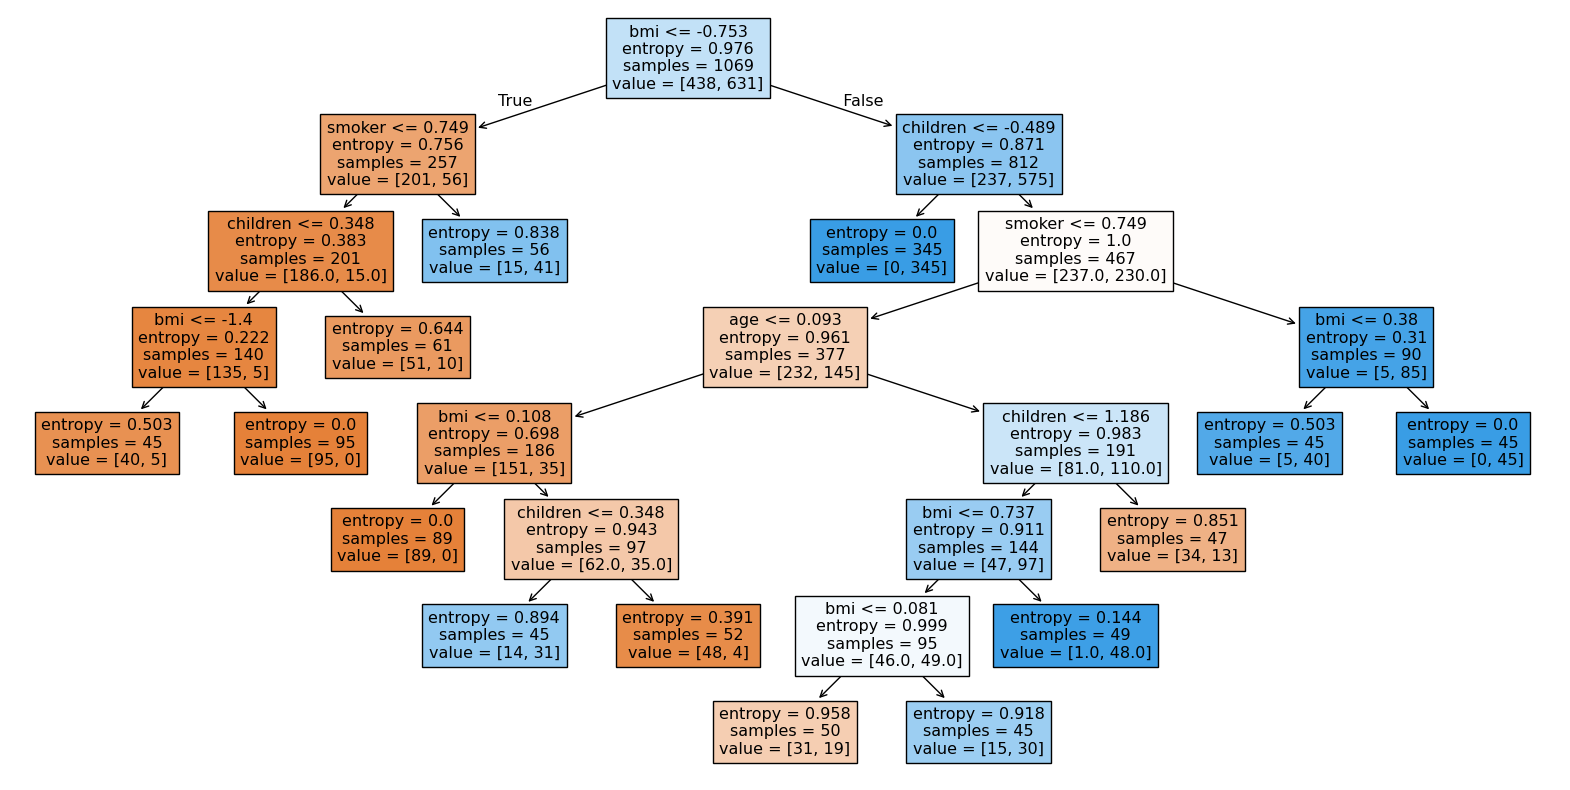

In [56]:
#so calling the class of tree
from sklearn.tree import plot_tree

#creating an object of plot__tree class
plt.figure(figsize=(20,10))  # Adjust the size of the plot as needed
plot_tree(dt2,feature_names=x.columns,filled=True)
plt.show()

# Note:-
## same process for dt classifier algorithm we can do by using criterion as   ='gini index'

# 
## 3rd classification algorithm that we r refering known as RandomForesttree classifier algorithm

# using Entropy method

In [57]:
#random forest tree classification Algorithm is a part of ensembling technique 
#working on bagging mechanism of boot stamping
#in rft we have to findout at what min number of feature and dt wer getting accuracy of model high

#calling the class of Random forest tree classifier algorithm
#data scientist work on difffernt differnt datset and given conclusion dt<=100 and dt>=10 whatever dataset 
#u r applying RFT Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier

#creating an object of RFT Classifier Algorithm
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',max_features=3,random_state=42)
rfc

RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=10,
                       random_state=42)

In [58]:
x.shape

(1337, 7)

In [59]:
#its Hit and Trial to findout what nos of Dt reqd to find best accuracy of model
# for feature in range(1,8,1):
#     #creating an object of RandomForestClassifier algorithm
#     rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',max_features=feature,random_state=42)
#     print(f'Feature Giving To Algorithm: {feature}')
#     #Training the model using 80% of train data
#     rfc.fit(x_train,y_train)
    
#     #testing the model by passing 20% test data and predicting output variable
#     y_pred = rfc.predict(x_test)
    
#     #evaluating the model
#     from sklearn.metrics import classification_report,confusion_matrix
#     print(classification_report(y_test,y_pred))
#     print(confusion_matrix(y_test,y_pred))
#     print('--------------------------------------------------------------------------')
    

#below result we can conclude that at min 3 nos of Feature if we give to RFC algorithm it create dt 10nos and 
#trained and test the model and getting high accuracy comparatively to other feature

    

In [60]:
#calling the function and getting the accuracy of the model
rfc = function(rfc)
rfc

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       117
           1       0.95      0.97      0.96       151

    accuracy                           0.95       268
   macro avg       0.95      0.95      0.95       268
weighted avg       0.95      0.95      0.95       268

[[109   8]
 [  5 146]]


RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=10,
                       random_state=42)

# using RFC Algorithm with gini index method

In [61]:
#its Hit and Trial to findout what nos of Dt reqd to find best accuracy of model
# for feature in range(1,8,1):
#     #creating an object of RandomForestClassifier algorithm
#     rfc = RandomForestClassifier(n_estimators=10,criterion='gini',max_features=feature,random_state=42)
#     print(f'Feature Giving To Algorithm: {feature}')
#     #Training the model using 80% of train data
#     rfc.fit(x_train,y_train)
    
#     #testing the model by passing 20% test data and predicting output variable
#     y_pred = rfc.predict(x_test)
    
#     #evaluating the model
#     from sklearn.metrics import classification_report,confusion_matrix
#     print(classification_report(y_test,y_pred))
#     print(confusion_matrix(y_test,y_pred))
#     print('--------------------------------------------------------------------------')
    

# below result we can conclude that at min 2 nos of Feature if we give to RFC algorithm it create dt 10nos and 
# trained and test the model and getting high accuracy comparatively to other feature

    

In [62]:
#Again creating RFC algorith object
rfc_gini = RandomForestClassifier(n_estimators=10,criterion='gini',max_features=2,random_state=42)
rfc_gini

RandomForestClassifier(max_features=2, n_estimators=10, random_state=42)

In [63]:
#calling the function and predicting accuracy of model
rfc_gini = function(rfc_gini)
rfc_gini

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       117
           1       0.95      0.93      0.94       151

    accuracy                           0.94       268
   macro avg       0.93      0.94      0.94       268
weighted avg       0.94      0.94      0.94       268

[[110   7]
 [ 10 141]]


RandomForestClassifier(max_features=2, n_estimators=10, random_state=42)

# 4th classification Algorithm refering from ensemble technique se

In [64]:
#ada boost,gradient boost ,xtreme gradient boost Classifier Algorithm

In [65]:
#ADA BOOST CLASSIFIER ALGORITHM is a method of Boosting Technique
#is also part of ensembling technique-->means we train given dataset on multiple classification algorithm--
#and by doing hard and soft voting we can conclude which algorithm is suitable for this given dataset

#ada boost will create decision stump(collection of root node and 2 leaf node which is a part of Decision tree 
#which feature comes into root node that can be found out by finding out IG value of each feature through gini index or entropy
#method and this algorithm assign initial wt and predict out varuable whaterve miss classified result taken care in 2nd iteration
#of decision stump...so on)
#single decision stump refered as WEEK LEARNER
#collection of all the decision stump refered as --->strong learner
#this strong learner will give best accuracu of model for given dataset


#at we r finding at what no of decisionstump(features)
#we r getting accuracy of model good compare to others

#so calling the class of ADA BOOST CLASSIFIER ALGORITHM
from sklearn.ensemble import AdaBoostClassifier


In [66]:
x.shape

(1337, 7)

In [67]:
#so its hit and trial method
# for i in range(x.shape[1],0,-1):
#     #creating an object of AdaBoostClassifier algorithm
#     ada = AdaBoostClassifier(n_estimators=i,random_state=42)
#     print(f'No of Features: {i}')
    
#     #now training and the model
#     ada.fit(x_train,y_train)
    
#     #now testing the model and predicting the output variable
#     y_pred = ada.predict(x_test)
    
#     #now evaluating the model by finding out classification report and confusin matrix
#     from sklearn.metrics import classification_report,confusion_matrix
#     print(classification_report(y_test,y_pred))
#     print(confusion_matrix(y_test,y_pred))
#     print('--------------------------------------')

#below result we can conclude at 3 no of feature we r getting recal accuracy good compare to others

In [68]:
#creating an object of AdaBoostClassifier algorithm
ada = AdaBoostClassifier(n_estimators=3,random_state=42)

#calling the function
ada = function(ada)
ada

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       117
           1       0.96      0.81      0.88       151

    accuracy                           0.87       268
   macro avg       0.88      0.88      0.87       268
weighted avg       0.89      0.87      0.87       268

[[112   5]
 [ 29 122]]


AdaBoostClassifier(n_estimators=3, random_state=42)

# gradient boosting algorithm

In [69]:
#gradient boosting is a meachanism of Boosting Technique
#is also part of ensembling technique
#create a full grown decision tree
#focusing on short coming error (residual error)
#whaterver misclassifed records taken care in 2nd iteration of full gorwn tree
#data scientist work on differnt differnt dataset and given conclusion DT <=10 AND DT>=100 whaterver datset u r working on
##and we r finding out at what minimum no of dt we r getting accuracy of model good comare to others

#so calling the class
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
#so hit and trial method
# for i in range(10,101,1):
#     #creating an object of gbc class
#     gbc=GradientBoostingClassifier(n_estimators=i,random_state=42)
#     print('nos of dt',i)
#     #calling the function
#     gbc=function(gbc)
#     gbc
#     print('='*50)

#below result we can conclude Min no of DT= 13 is required to get high recall score compare to others

In [71]:
#creating an object of gbc class
gbc=GradientBoostingClassifier(n_estimators=13,random_state=42)

In [72]:
#calling the function
gbc = function(gbc)
gbc

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       117
           1       0.92      0.94      0.93       151

    accuracy                           0.92       268
   macro avg       0.92      0.92      0.92       268
weighted avg       0.92      0.92      0.92       268

[[105  12]
 [  9 142]]


GradientBoostingClassifier(n_estimators=13, random_state=42)

# xtreme gradient boosting algorithm

In [73]:
#xgradient boosting is a meachanism of xgboost Technique
#create a full grown decision tree
#focusing on short coming error (residual error)
#whaterver misclassifed records taken care in 2nd iteration of full gorwn tree
#data scientist work on differnt differnt dataset and given conclusion DT <=10 AND DT>=100 whaterver datset u r working on
#processing is fast compare to gradient boosting
#handle null,outlier overfittin model we have to pass parameter reg_alpha=1
#it is multi threading in nature
#it is parallel processing in nature

#so calling the class
from xgboost import XGBClassifier

In [74]:
#so hit and trial method
# for i in range(10,101,1):
#     #creating an object of gbc class
#     gbc=XGBClassifier(n_estimators=i,random_state=42,reg_alpha=1)
#     print('nos of dt',i)
#     #calling the function
#     gbc=function(gbc)
#     gbc
#     print('='*50)

#below result we can conclude Min no of DT= 10 is required to get high recall score compare to others

In [75]:
#creating an object of XGBClassifier algorithm
gbc=XGBClassifier(n_estimators=10,random_state=42,reg_alpha=1)

#calling the function
gbc = function(gbc)
gbc

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       117
           1       0.98      0.99      0.99       151

    accuracy                           0.99       268
   macro avg       0.99      0.98      0.98       268
weighted avg       0.99      0.99      0.99       268

[[114   3]
 [  1 150]]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# 5th classification algorithm-->support vector machine (svm)

In [76]:
#calling the class of SVM classifier --->machine will predict the boundry layer or hyperplane which seprates the classes
#hyperplane are 2 type--->
#a)linear sepratable hyperplane b)non linear sepratable hyperplane(radial bias kernel,poly nomial kernel)

#in svm classifer at time of training the model we have to add external error range lie btn 0 to 1 
#if no improvement in accuracy occur that indicate hyperplane is non linear sepratable

#before adding the external error in svm classifier algorithm
from sklearn.svm import LinearSVC

#creating an object of LinearSVC class
svc = LinearSVC(random_state=42)

In [77]:
#now calling the function and getting the accuracy of model 
svc = function(svc)
svc
#if no external added in the model the recall accuracy coming out to be good 
#but may the dataset contain outliers in it bcoz of that model can over iftted so we have to add error in it 

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       117
           1       0.90      0.91      0.90       151

    accuracy                           0.89       268
   macro avg       0.89      0.89      0.89       268
weighted avg       0.89      0.89      0.89       268

[[102  15]
 [ 14 137]]


LinearSVC(random_state=42)

In [78]:
#adding eeror in LinearSVC
svc1 = LinearSVC(random_state=42,C=0.5)
svc1 = function(svc1)
svc1

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       117
           1       0.90      0.91      0.90       151

    accuracy                           0.89       268
   macro avg       0.89      0.89      0.89       268
weighted avg       0.89      0.89      0.89       268

[[102  15]
 [ 14 137]]


LinearSVC(C=0.5, random_state=42)

In [79]:
#adding eeror in LinearSVC
svc1 = LinearSVC(random_state=42,C=0.9)
svc1 = function(svc1)
svc1
#after adding the error to at time of training the model no improvement in accuracy we have seen 
#highly chances is that hyperplane is non linear sepratable

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       117
           1       0.90      0.91      0.90       151

    accuracy                           0.89       268
   macro avg       0.89      0.89      0.89       268
weighted avg       0.89      0.89      0.89       268

[[102  15]
 [ 14 137]]


LinearSVC(C=0.9, random_state=42)

In [80]:
#calling the non linear sepratable hyperplane SVM classifier Algorithm
from sklearn.svm import SVC

#Creating an object of SVC class
svc_poly = SVC(random_state=42,C=0.9,kernel='poly')

#now checking the accuracy of model
svc_poly = function(svc_poly)
svc_poly

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       117
           1       0.91      0.93      0.92       151

    accuracy                           0.91       268
   macro avg       0.91      0.90      0.90       268
weighted avg       0.91      0.91      0.91       268

[[103  14]
 [ 11 140]]


SVC(C=0.9, kernel='poly', random_state=42)

In [81]:
#Creating an object of SVC class
svc_rad = SVC(random_state=42,C=0.9,kernel='rbf')

#now checking the accuracy of model
svc_rad = function(svc_rad)
svc_rad

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       117
           1       0.94      0.89      0.91       151

    accuracy                           0.90       268
   macro avg       0.90      0.91      0.90       268
weighted avg       0.91      0.90      0.90       268

[[108   9]
 [ 17 134]]


SVC(C=0.9, random_state=42)

In [82]:
#conclusion :- for this given dataset the dataset is non linera sepratable hyperplane and best accuracy for this dataset 
#we r getting in randial bias kernel function so we r adopting this model for my dataset

# Visualising Insurance Dataset

In [83]:
csv_file = r'D:\ML_INSURANCE_CLAIM_PREDICTION\artifacts\raw.csv'
df1 = pd.read_csv(csv_file,sep=',')
df1.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [85]:
#insuranceclaim dtype is discrete column value--so we plot bar graph,pie graph,countplot graph
#all are frequency graph generally suitable for object dtype column value ke liye
#if dtype is numeric type type of graph we r prefering pairplot,scatter,line plot,histplot graph,distplot graph
#except line and scatter,pairplot---->alll the graph are frequency graph generally suuitable for numeric dtype column value

#insurance claim dtype is discrete type so we r plotting counterplot graph
#property :-its a frequency graph generally suitable for object type column

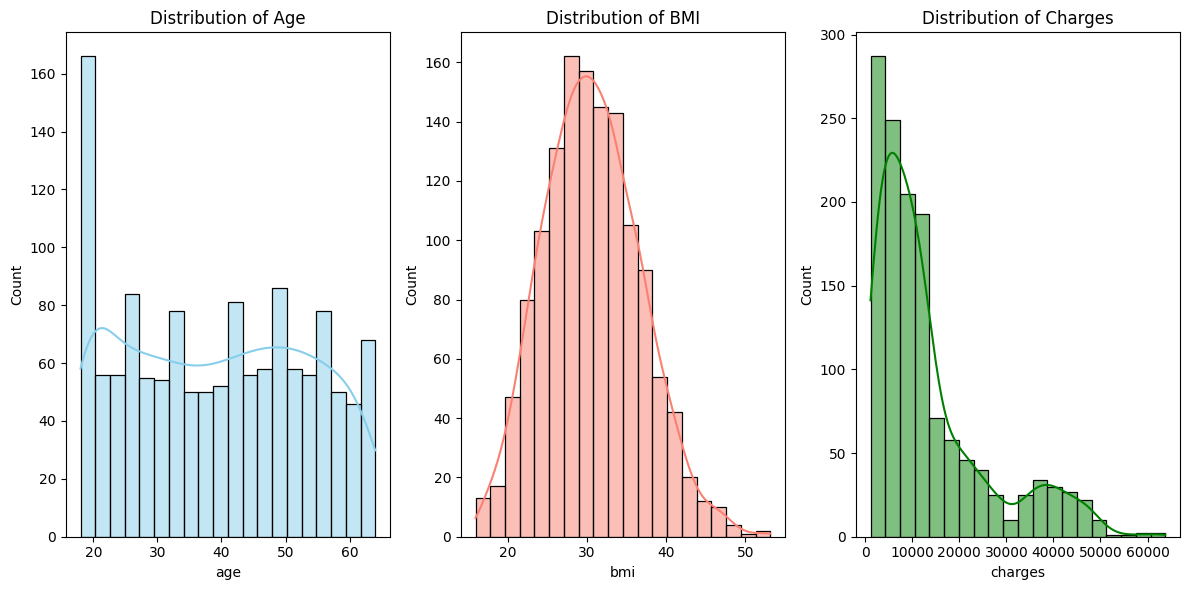

In [86]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sb.histplot(df1['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sb.histplot(df1['bmi'], bins=20, kde=True, color='salmon')
plt.title('Distribution of BMI')

plt.subplot(1, 3, 3)
sb.histplot(df1['charges'], bins=20, kde=True, color='green')
plt.title('Distribution of Charges')

plt.tight_layout()
plt.show()
